Date Created: Apr 2, 2022 @ 18.55 mst

---

# **Overview:**

ODE solver for the following equations:


The notebook is outlined as follows:

    Part 1: Lorenz System
        
    Part 2: Chen System
    
    Part 3: Genesio system
    
    Part 4: Hyperchaotic Rossler system
    
    Links
    
    References 

**Questions:** 

    - Why is it always RK4?
    

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA # convention for linalg

%matplotlib notebook 

---

# **Part 1: Lorenz System**

Summary: 3D model of the Lorenz ODE system approximated usingcthe 4th-order Runge-Kutta method.

---

Defining the variables needed for the fourth order Runge Kutta method.

In [2]:
x = input('choose a starting value for x: ')  # choose initial condition, x
y = input('choose a starting value for y: ')  # choose initial condition, y
z = input('choose a starting value for z: ')  # choose initial condition, z

t0 = 0.
tf = 100.
dt = 0.01  # time step sufficiently small
tmax = 100.
vector_t = np.arange(t0, tmax, dt) # time scale
n = len(vector_t)

rho = 28.  # check wiki page for info of rho depencancy/interesting values
sigma = 10.
beta = 8./3.


k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])

choose a starting value for x: 1
choose a starting value for y: 1
choose a starting value for z: 1


Defining the three equations of the Lorenz Attractor.

In [3]:
def equation_1(t, x, y, z):
    return sigma*(y - x)


def equation_2(t, x, y, z):
    return rho*x - y - x*z


def equation_3(t, x, y, z):
    return x*y - beta*z

### A function is created with the 4th-order Runge Kutta method to approximate the ODE.



The following are the variables that need to be passed through the function:

- t : Time


- x, y, z : 3-dim coordinates
    - the initial conditions are defined as x0, y0, z0 and stored in these
    - each iteration stores the new value in these variables
    - all three are stored in an array
    - the function returns this array at each iteration
        - i.e. RK4(t, ... , dt) returns a 3 by 1 array
        
        
- equation_1, ... , equation_3 : Equations in the system of ODE's to be solved


- dt : Time step
    - The spatial grid is defined above


The function returns a 3 by 1 array with x, y, z components at each step in time, t.

In [4]:
def RK4(t, x, y, z, equation_1, equation_2, equation_3, dt):

    k1[0] = dt*equation_1(t, x, y, z)
    k1[1] = dt*equation_2(t, x, y, z)
    k1[2] = dt*equation_3(t, x, y, z)

    k2[0] = dt*equation_1(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[1] = dt*equation_2(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[2] = dt*equation_3(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)

    k3[0] = dt*equation_1(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[1] = dt*equation_2(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[2] = dt*equation_3(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)

    k4[0] = dt*equation_1(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[1] = dt*equation_2(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[2] = dt*equation_3(t + dt, x + k3[0], y + k3[1], z + k3[2])

    x = x + (1./6.)*(k1[0] + 2.*k2[0] + 2.*k3[0] + k4[0])
    y = y + (1./6.)*(k1[1] + 2.*k2[1] + 2.*k3[1] + k4[1])
    z = z + (1./6.)*(k1[2] + 2.*k2[2] + 2.*k3[2] + k4[2])

    return np.array([x, y, z, t])

### Collecting Data

Three lists are created to store the x, y, and z values at each iteration, and a loop is used to call the function at each time step, dt, on the defined time domain. So 'rk4_data_lorenz' can be called later and it will have a long list of entries, where earch entry is an array with an x, y, z stored from each iteration.

In [5]:
rk4_data_lorenz = np.zeros((n, 4)) # setting initial conditions
rk4_data_lorenz[0, 0] = x
rk4_data_lorenz[0, 1] = y
rk4_data_lorenz[0, 2] = z
rk4_data_lorenz[0, 3] = vector_t[0]


for i in range(n-1): # loop the stages over i
    rk4_data_lorenz[i+1, :] = RK4(vector_t[i], rk4_data_lorenz[i, 0], rk4_data_lorenz[i, 1],
                       rk4_data_lorenz[i, 2], equation_1, equation_2, equation_3, dt)

### Equilibrium Points

Summary: Implementation of Newton's method to find the root of Chen's Equations.


- The nonlinear equations used are Chen's Equation
- The partial derivatives were calculated by hand and stored in the Jacobian matrix
- Both equations are stored in the vector function as an array.
- x0, x1, x2 are used to store the users input of the initial condition to be called on at the end in the printed result. 
- x is the initial condition used by the algorithm which stores x0, x1, and x2 in an array.
- The two variables in the nonlinear equations are stored in x after each iteration.
- Count stores the number of iterations. 
- The max counter is put in for the case that the initial guess does not result in a solution. 
- Epsilon is defined as machine epsilon. 
- fval is the value of y or f(x). 
- Fnorm is the 2 norm calculated by NumPy

Note: since x,y values are stored in an array called x, x[0]=x, x[1]=y, x[2]=z values

In [6]:
rk4_data_lorenz

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 1.01256719e+00,  1.25991780e+00,  9.84890972e-01,
         0.00000000e+00],
       [ 1.04882371e+00,  1.52399713e+00,  9.73114220e-01,
         1.00000000e-02],
       ...,
       [-1.41955619e+00, -2.53405237e+00,  1.14824035e+01,
         9.99600000e+01],
       [-1.53606646e+00, -2.75357769e+00,  1.12187938e+01,
         9.99700000e+01],
       [-1.66343252e+00, -2.99519337e+00,  1.09689394e+01,
         9.99800000e+01]])

In [7]:
print(rk4_data_lorenz[0,:])

[1. 1. 1. 0.]


In [8]:
print(rk4_data_lorenz[:10, :])

[[1.         1.         1.         0.        ]
 [1.01256719 1.2599178  0.98489097 0.        ]
 [1.04882371 1.52399713 0.97311422 0.01      ]
 [1.10720885 1.79830989 0.96515895 0.02      ]
 [1.18686802 2.08854014 0.96173722 0.03      ]
 [1.28755706 2.40015446 0.96380606 0.04      ]
 [1.40957066 2.73854561 0.97260817 0.05      ]
 [1.55369006 3.10915397 0.98973112 0.06      ]
 [1.72114638 3.51756946 1.01718652 0.07      ]
 [1.9135962  3.96961501 1.05751186 0.08      ]]


In [9]:
start = np.array([int(rk4_data_lorenz[0, 0]), int(rk4_data_lorenz[0, 1]), int(rk4_data_lorenz[0, 2])])


print('These are the initial conditions [x y z] = ', start)

These are the initial conditions [x y z] =  [1 1 1]


In [10]:
def Vect_Function(start):  # the vector function stores f and g
    return np.array([sigma*(start[1] - start[0]),
                     rho*start[0] - start[1] - start[0]*start[2],
                     start[0]*start[1] - beta*start[2]])


def Jacobian(start):  # partial derivatives calculated/added by hand
    return np.array([[-sigma, sigma, 0],
                     [rho - start[2], -1., start[0]],
                     [start[1], start[0], -beta ] ])

In [11]:
def Newton_SystEq(Vect_Function, Jacobian, start, epsilon):

    fval = Vect_Function(start)
    Fnorm = LA.norm(fval, ord=2)  # L2 norm by numpy
    iteration_count = 0

    # loop until epsilon or max iterations is reached
    while abs(Fnorm) > epsilon and iteration_count < 100:
        term = LA.solve(Jacobian(start), -fval)
        start = start + term
        fval = Vect_Function(start)
        Fnorm = LA.norm(fval, ord=2)
        iteration_count += 1  # add one iteration to the counter

        # not necessary to print but fun to look at for small approx.
        print('We get ', fval, 'after ', iteration_count, 'iterations')

    if abs(Fnorm) > epsilon:
        iteration_count = -1  # go back one iteration once epsilon is passed

    return start, iteration_count  # x output is an 1x2 array, count is an int


start, iteration_count = Newton_SystEq(Vect_Function, Jacobian, start, epsilon=1.0e-6)

We get  [1.11022302e-15 1.40514455e+00 8.99838414e-01] after  1 iterations
We get  [-6.93889390e-17 -1.70303398e-02  2.70739133e-03] after  2 iterations
We get  [-1.08420217e-18  6.40149699e-07  3.97849752e-07] after  3 iterations


In [12]:
# import matplotlib to graph
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


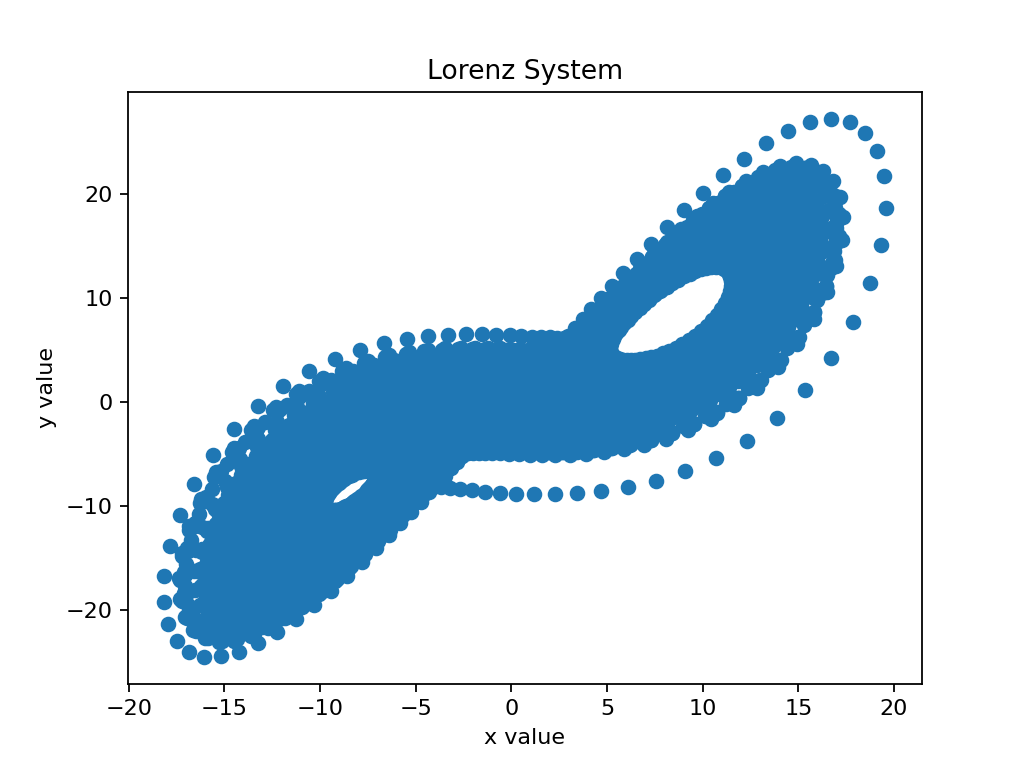

<IPython.core.display.Javascript object>


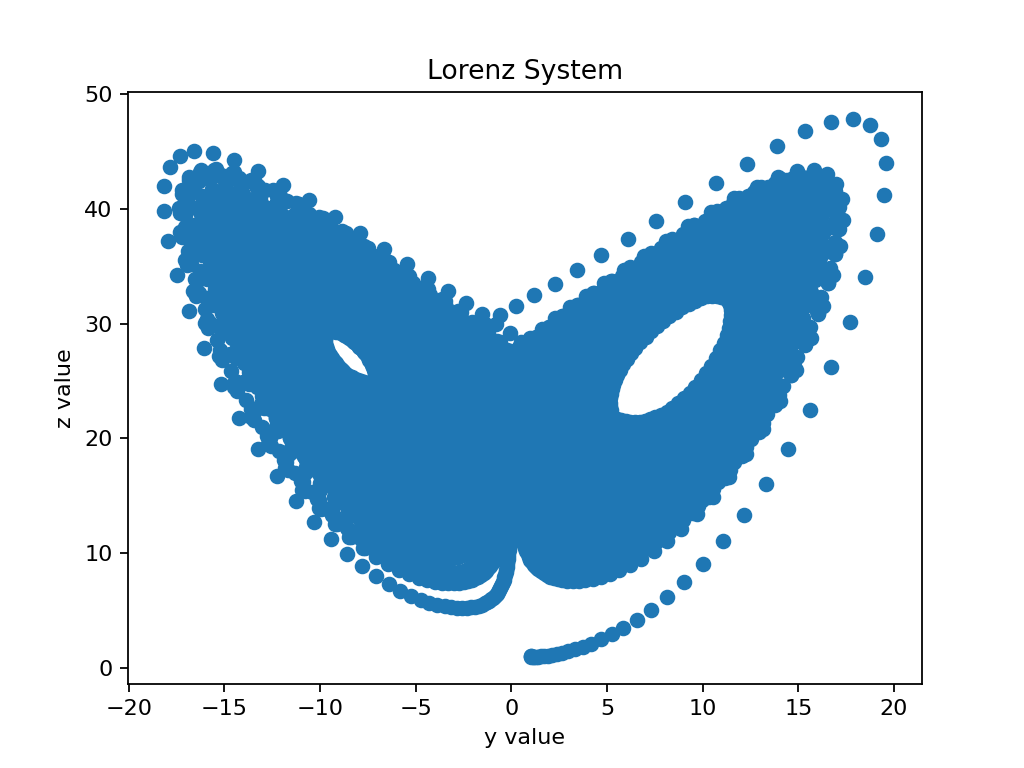

<IPython.core.display.Javascript object>


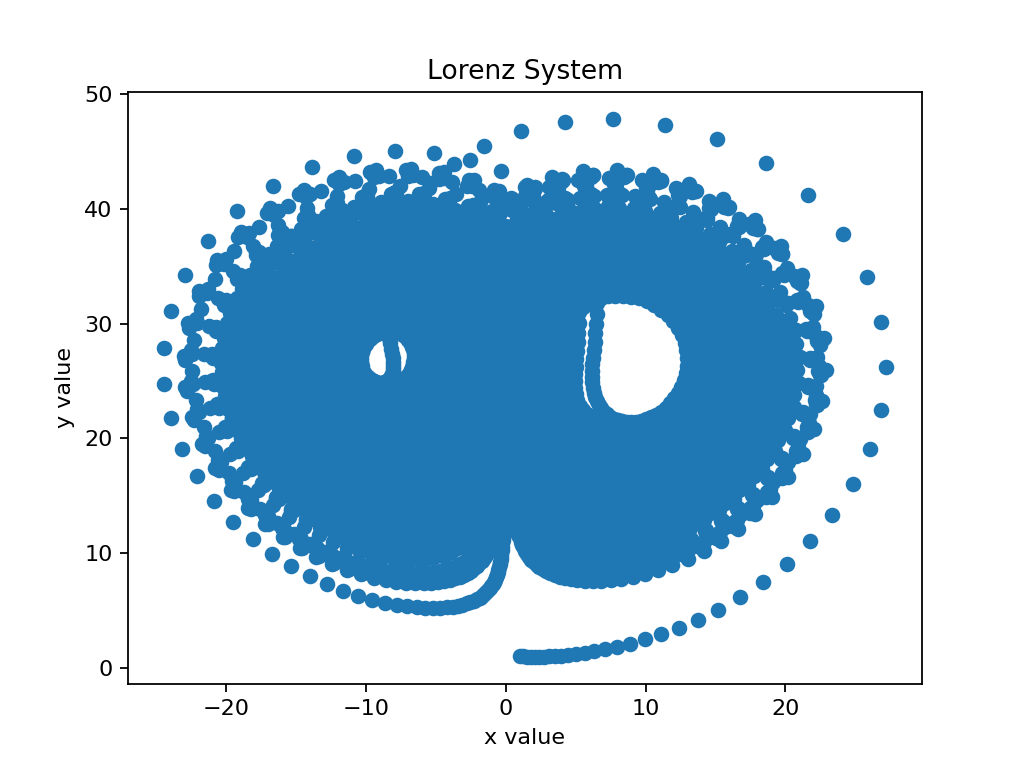

In [13]:
plt.figure() # 2D plot
plt.title("Lorenz System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.scatter(rk4_data_lorenz[:i, 0], rk4_data_lorenz[:i, 1])
plt.show() 

plt.figure() # 2D plot
plt.title("Lorenz System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.scatter(rk4_data_lorenz[:i, 0], rk4_data_lorenz[:i, 2])
plt.show()


plt.figure() # 2D plot
plt.title("Lorenz System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.scatter(rk4_data_lorenz[:i, 1], rk4_data_lorenz[:i, 2])
plt.show() 

<IPython.core.display.Javascript object>


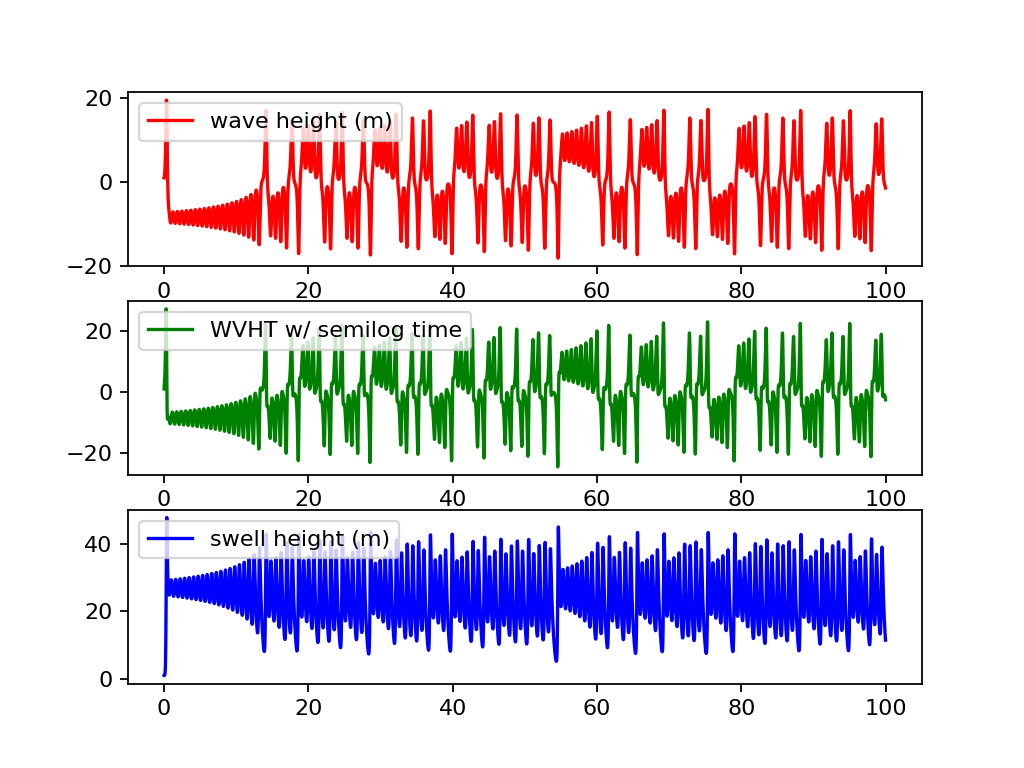

In [14]:
plt.figure() # create another plot

plt.title("Time Step vs. x, y, z) ")
plt.ylabel('x, y, z')
plt.xlabel('Time (iteration/step)')

plt.subplot(311)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 0], color='r', label="wave height (m)")
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 1], color='g', label="WVHT w/ semilog time")
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_lorenz[:i, 3], rk4_data_lorenz[:i, 2], color='b', label="swell height (m)")
plt.legend()

plt.show()

---

# Part 2: Chen System

Summary: 3D model of the Chen system approximated using the 4th-order Runge-Kutta method.

---

In [15]:
x = input('choose a starting value for x: ')  # choose initial condition, x
y = input('choose a starting value for y: ')  # choose initial condition, y
z = input('choose a starting value for z: ')  # choose initial condition, z

t0 = 0.
tf = 100.
dt = 0.01  # time step sufficiently small
tmax = 100.
vector_t = np.arange(t0, tmax, dt) # time scale
n = len(vector_t)

rho = 28.
sigma = 40.
beta = 3.

k1 = np.array([0., 0., 0.]) # initialize
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])

choose a starting value for x: 1
choose a starting value for y: 1
choose a starting value for z: 1


In [16]:
def equation_1(t, x, y, z):
    return sigma*(y - x)


def equation_2(t, x, y, z):
    return (rho - sigma)*x - x*z + rho*y


def equation_3(t, x, y, z):
    return x*y - beta*z

In [17]:
rk4_data_chen = np.zeros((n, 4)) # setting initial conditions
rk4_data_chen[0, 0] = x
rk4_data_chen[0, 1] = y
rk4_data_chen[0, 2] = z
rk4_data_chen[0, 3] = vector_t[0]


for i in range(n - 1): # loop the stages over i
    rk4_data_chen[i+1, :] = RK4(vector_t[i], rk4_data_chen[i, 0], rk4_data_chen[i, 1],
                       rk4_data_chen[i, 2], equation_1, equation_2, equation_3, dt)

In [18]:
start = np.array([int(rk4_data_chen[0, 0]), int(rk4_data_chen[0, 1]), int(rk4_data_chen[0, 2])])


print('These are the initial conditions [x y z] = ', start)

These are the initial conditions [x y z] =  [1 1 1]


In [19]:
def Vect_Function(start):  # the vector function stores f and g
    return np.array([sigma*(start[1] - start[0]),
                     (rho - sigma)*start[0] + rho*start[1] - start[0]*start[2],
                     -beta*start[2] + start[0]*start[1]])


def Jacobian(start):  # partial derivatives calculated/added by hand
    return np.array([[-sigma, sigma, 0],
                     [rho - sigma - start[2], rho, start[0]],
                     [start[1], start[0], -beta]])

In [20]:
def Newton_SystEq(Vect_Function, Jacobian, start, epsilon):

    fval = Vect_Function(start)
    Fnorm = LA.norm(fval, ord=2)  # L2 norm by numpy
    iteration_count = 0

    # loop until epsilon or max iterations is reached
    while abs(Fnorm) > epsilon and iteration_count < 100:
        term = LA.solve(Jacobian(start), -fval)
        start = start + term
        fval = Vect_Function(start)
        Fnorm = LA.norm(fval, ord=2)
        iteration_count += 1  # add one iteration to the counter

        # not necessary to print but fun to look at for small approx.
        print('We get ', fval, 'after ', iteration_count, 'iterations')

    if abs(Fnorm) > epsilon:
        iteration_count = -1  # go back one iteration once epsilon is passed

    return start, iteration_count  # x output is an 1x2 array, count is an int


start, iteration_count = Newton_SystEq(Vect_Function, Jacobian, start, epsilon=1.0e-6)

We get  [0.         1.38524219 0.83703033] after  1 iterations
We get  [ 0.         -0.02293482  0.0074891 ] after  2 iterations
We get  [0.00000000e+00 3.57527959e-06 2.05471124e-06] after  3 iterations
We get  [ 1.05879118e-21 -1.53045128e-13  4.99321259e-14] after  4 iterations


<IPython.core.display.Javascript object>


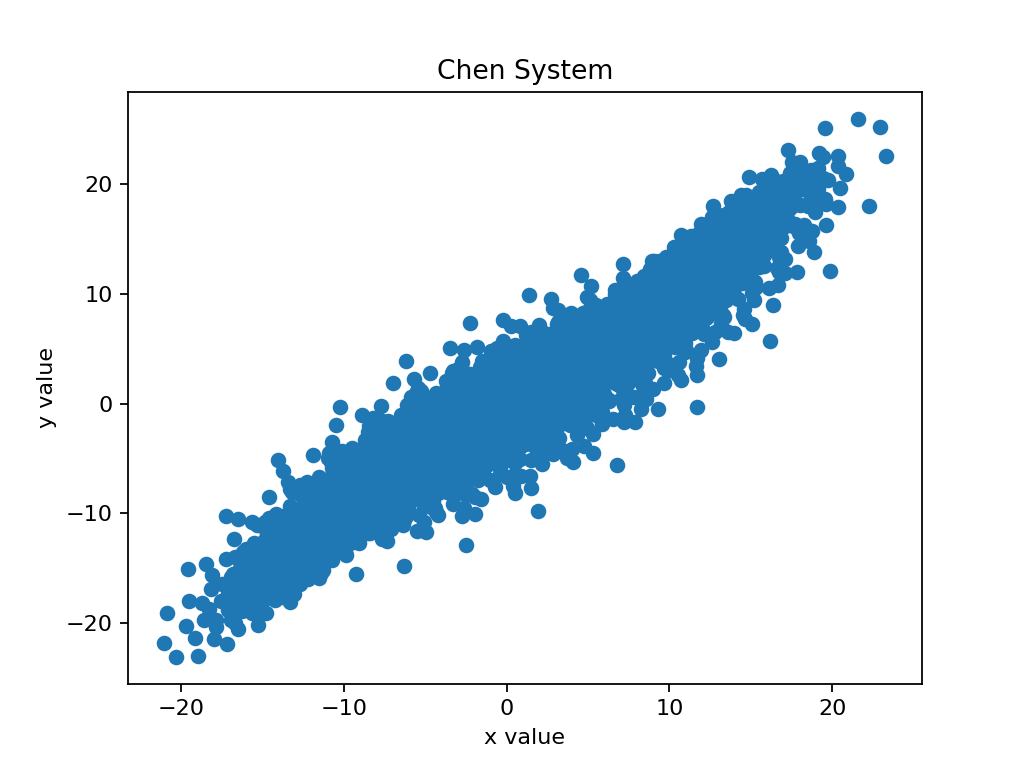

<IPython.core.display.Javascript object>


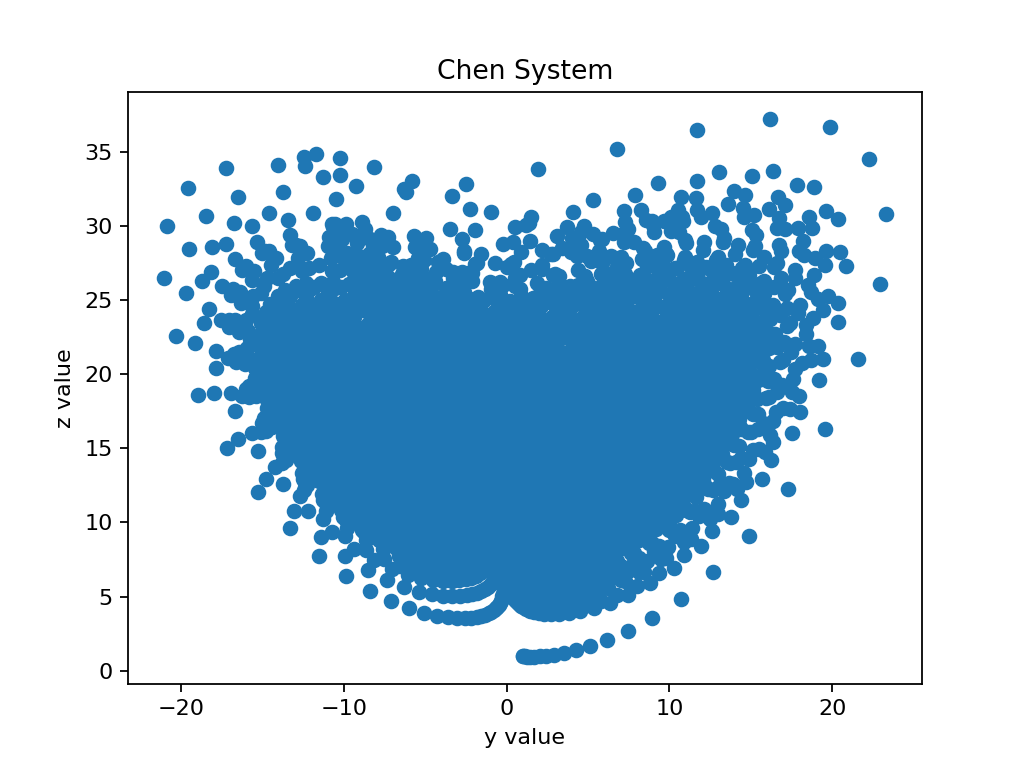

<IPython.core.display.Javascript object>


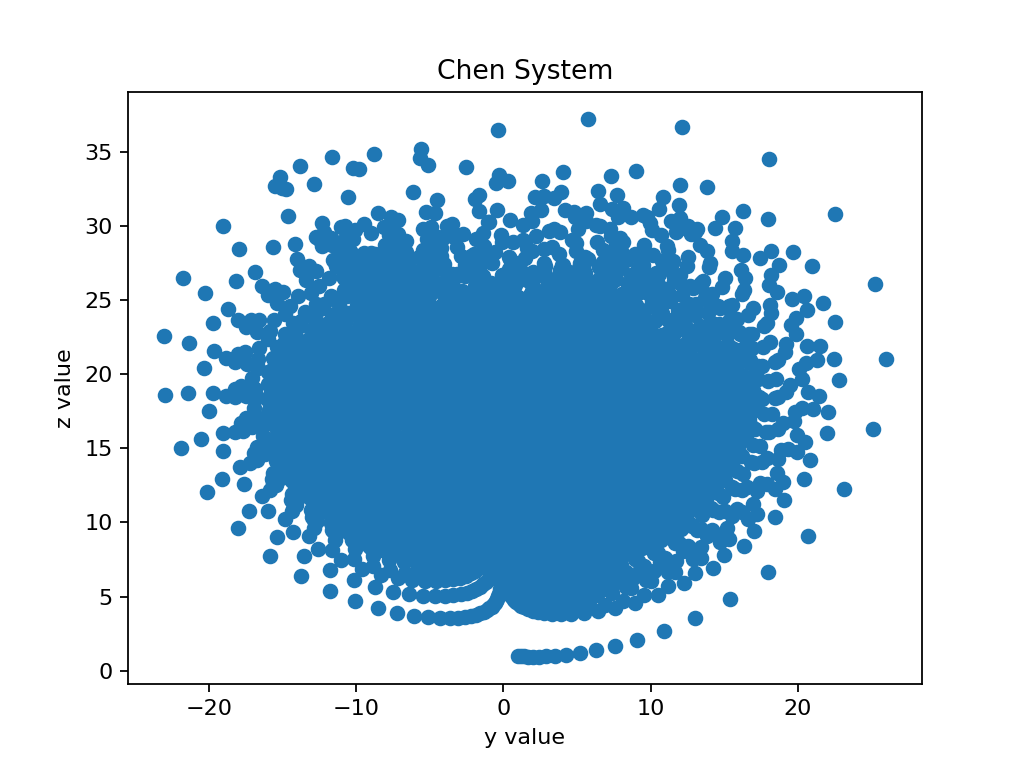

In [21]:
plt.figure() # 2D plot
plt.title("Chen System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.scatter(rk4_data_chen[:i, 0], rk4_data_chen[:i, 1])
plt.show()


plt.figure() # 2D plot
plt.title("Chen System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.scatter(rk4_data_chen[:i, 0], rk4_data_chen[:i, 2])
plt.show()

plt.figure() # 2D plot
plt.title("Chen System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.scatter(rk4_data_chen[:i, 1], rk4_data_chen[:i, 2])
plt.show()

<IPython.core.display.Javascript object>


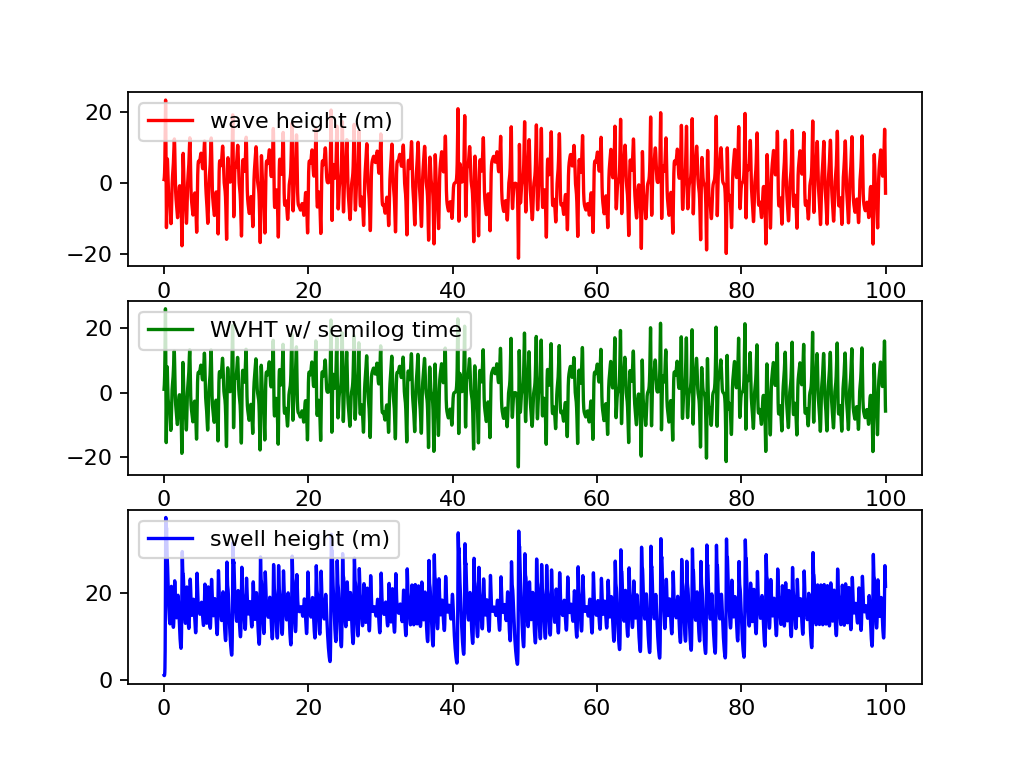

In [22]:
plt.figure() # create another plot

plt.title("Time Step vs. x, y, z) ")
plt.ylabel('x, y, z')
plt.xlabel('Time (iteration/step)')

plt.subplot(311)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 0], color='r', label="wave height (m)")
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 1], color='g', label="WVHT w/ semilog time")
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_chen[:i, 3], rk4_data_chen[:i, 2], color='b', label="swell height (m)")
plt.legend()

plt.show()

---

# Part 3: Genesio System

Summary: 3D model of the Genesio system approximated using the 4th-order Runge-Kutta method.

---

In [80]:
x = float(input('choose a starting value for x: '))  # choose initial condition, x
y = float(input('choose a starting value for y: '))  # choose initial condition, y
z = float(input('choose a starting value for z: '))  # choose initial condition, z

t0 = 0.
tf = 100.
dt = 0.01  # time step sufficiently small
tmax = 100.
vector_t = np.arange(t0, tmax, dt) # time scale
n = len(vector_t)

rho = 2.  # check wiki page for info of rho depencancy/interesting values
sigma = 1.
beta = 1.


k1 = np.array([0., 0., 0.]) # initialize
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])

choose a starting value for x: 1
choose a starting value for y: 1
choose a starting value for z: 1


In [81]:
def equation_1(t, x, y, z):
    return y


def equation_2(t, x, y, z):
    return z


def equation_3(t, x, y, z):
    return -rho*x - beta*y - sigma*z + x**2

In [82]:
rk4_data_genesio = np.zeros((n, 4)) # setting initial conditions
rk4_data_genesio[0, 0] = x
rk4_data_genesio[0, 1] = y
rk4_data_genesio[0, 2] = z
rk4_data_genesio[0, 3] = vector_t[0]


for i in range(n - 1): # loop the stages over i
    rk4_data_genesio[i+1, :] = RK4(vector_t[i], rk4_data_genesio[i, 0], rk4_data_genesio[i, 1],
                       rk4_data_genesio[i, 2], equation_1, equation_2, equation_3, dt)

/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_81550/3554950513.py:10: RuntimeWarning: overflow encountered in double_scalars
  return -rho*x - beta*y - sigma*z + x**2
/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_81550/3554950513.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return -rho*x - beta*y - sigma*z + x**2


In [83]:
start = np.array([int(rk4_data_genesio[0, 0]), int(rk4_data_genesio[0, 1]), int(rk4_data_genesio[0, 2])])


print('These are the initial conditions [x y z] = ', start)

These are the initial conditions [x y z] =  [1 1 1]


In [84]:
def Vect_Function(start):  # the vector function stores f and g
    return np.array([start[1],
                     start[2],
                     - rho*start[0] - beta*start[1] - sigma*start[2] + start[0]**2])


def Jacobian(start):  # partial derivatives calculated/added by hand
    return np.array([[0, 1, 0],
                     [0, 0, 1],
                     [-rho + 2*start[0], -beta, -sigma]])

In [85]:
def Newton_SystEq(Vect_Function, Jacobian, start, epsilon):

    fval = Vect_Function(start)
    Fnorm = LA.norm(fval, ord=2)  # L2 norm by numpy
    iteration_count = 0

    # loop until epsilon or max iterations is reached
    while abs(Fnorm) > epsilon and iteration_count < 100:
        term = LA.solve(Jacobian(start), -fval)
        start = start + term
        fval = Vect_Function(start)
        Fnorm = LA.norm(fval, ord=2)
        iteration_count += 1  # add one iteration to the counter

        # not necessary to print but fun to look at for small approx.
        print('We get ', fval, 'after ', iteration_count, 'iterations')

    if abs(Fnorm) > epsilon:
        iteration_count = -1  # go back one iteration once epsilon is passed

    return start, iteration_count  # x output is an 1x2 array, count is an int


start, iteration_count = Newton_SystEq(Vect_Function, Jacobian, start, epsilon=1.0e-6)

LinAlgError: Singular matrix

### Plots

<IPython.core.display.Javascript object>


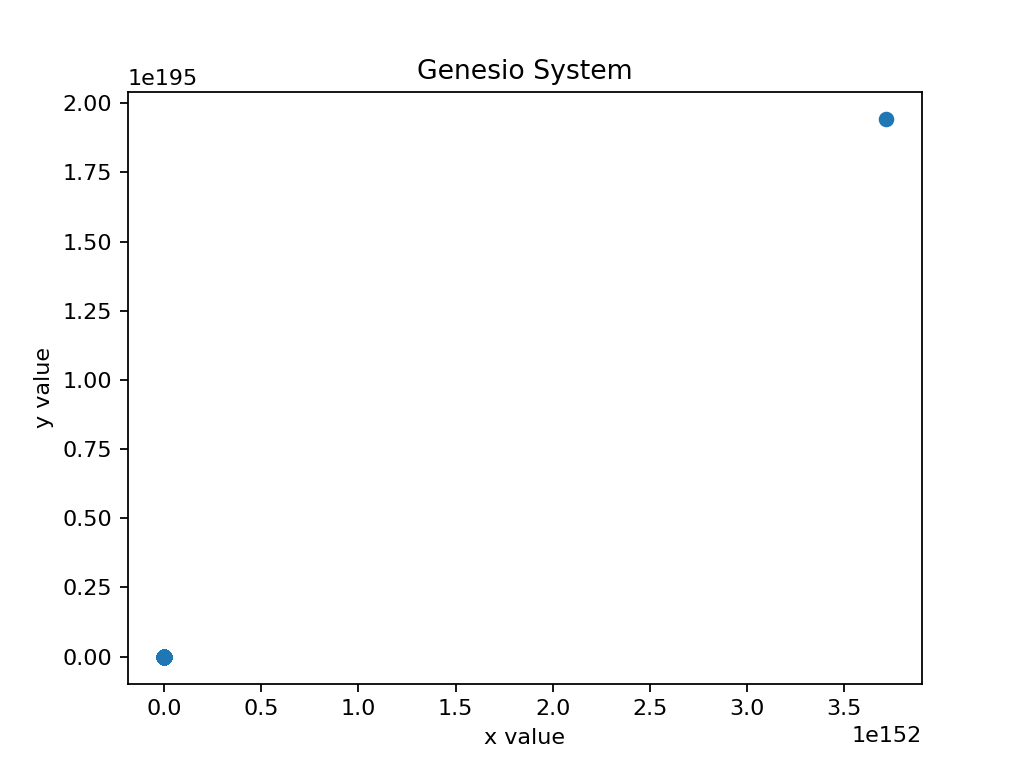

<IPython.core.display.Javascript object>


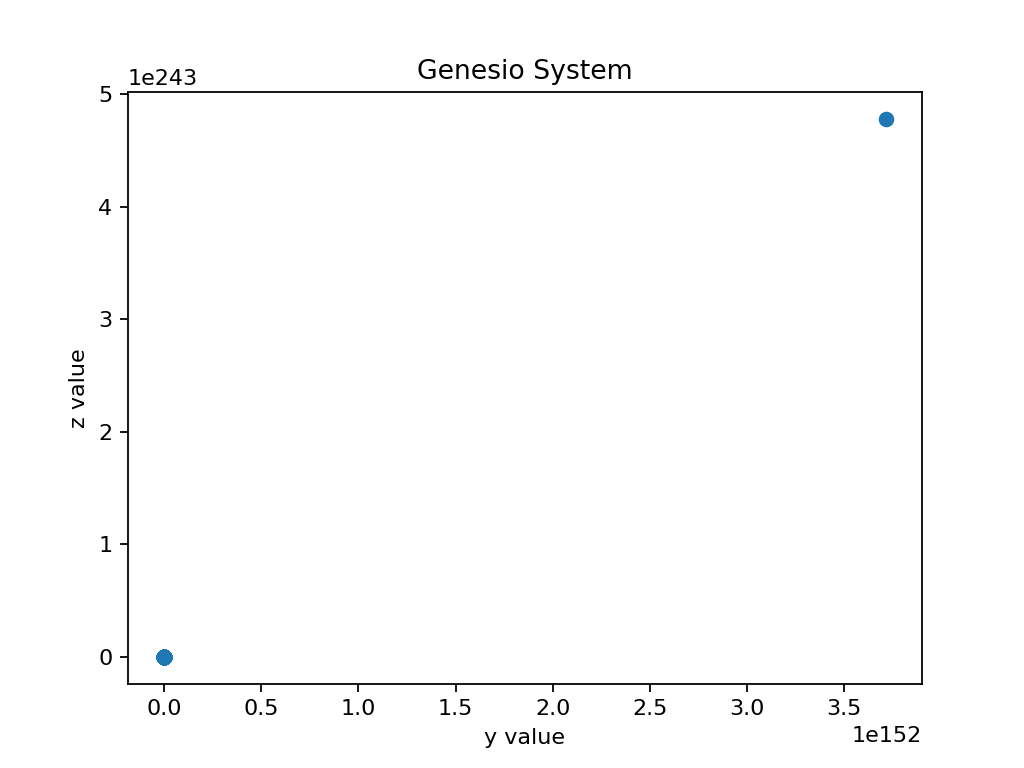

<IPython.core.display.Javascript object>


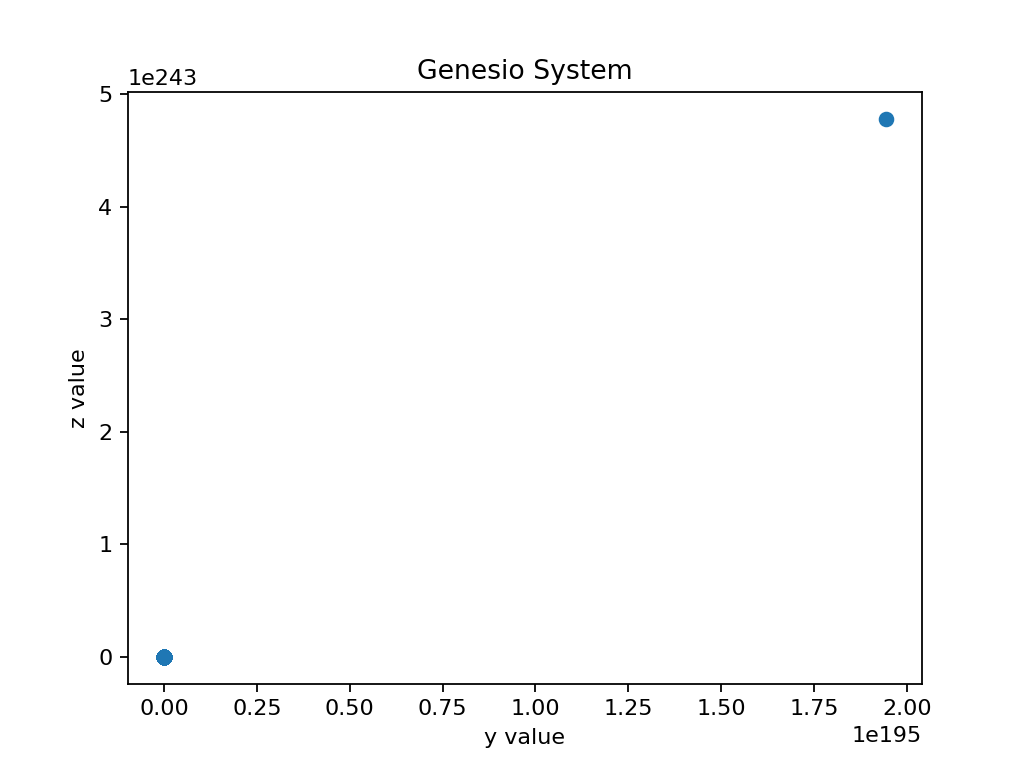

In [86]:
plt.figure() # 2D plot
plt.title("Genesio System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.scatter(rk4_data_genesio[:i, 0], rk4_data_genesio[:i, 1])
plt.show()


plt.figure() # 2D plot
plt.title("Genesio System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.scatter(rk4_data_genesio[:i, 0], rk4_data_genesio[:i, 2])
plt.show()

plt.figure() # 2D plot
plt.title("Genesio System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.scatter(rk4_data_genesio[:i, 1], rk4_data_genesio[:i, 2])
plt.show()

### Subplots

<IPython.core.display.Javascript object>


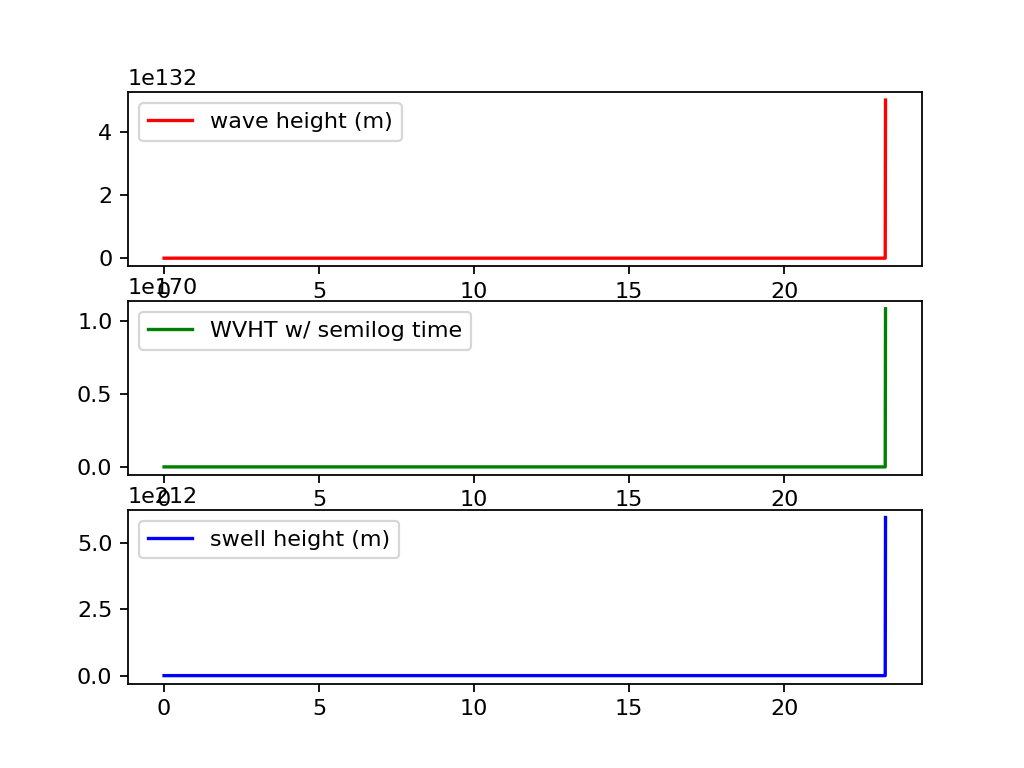

In [69]:
plt.figure() # create another plot

plt.title("Time Step vs. x, y, z) ")
plt.ylabel('x, y, z')
plt.xlabel('Time (iteration/step)')

plt.subplot(311)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 0], color='r', label="wave height (m)")
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 1], color='g', label="WVHT w/ semilog time")
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_genesio[:i, 3], rk4_data_genesio[:i, 2], color='b', label="swell height (m)")
plt.legend()

plt.show()

---

# Part 4: Hyperchaotic Rossler System

Summary: 3D model of the Hyperchaotic Rossler system approximated using the 4th-order Runge-Kutta method.

---

In [31]:
x = input('choose a starting value for x: ')  # choose initial condition, x
y = input('choose a starting value for y: ')  # choose initial condition, y
z = input('choose a starting value for z: ')  # choose initial condition, z
w = input('choose a starting value for w: ')  # choose initial condition, w

t0 = 0.
tf = 100.
dt = 0.01  # time step sufficiently small
tmax = 100.
vector_t = np.arange(t0, tmax, dt) # time scale
n = len(vector_t)

sigma = 10.
beta = 8./3.
rho = 28.  # check wiki page for info of rho depencancy/interesting values
phi = 10


k1 = np.array([0., 0., 0.]) # initialize
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])

choose a starting value for x: 1
choose a starting value for y: 1
choose a starting value for z: 1
choose a starting value for w: 1


In [34]:
def equation_1(t, x, y, z, w):
    return -y - z


def equation_2(t, x, y, z, w):
    return x + sigma*y + w


def equation_3(t, x, y, z, w):
    return beta + x*z


def equation_4(t, x, y, z, w):
    return -rho*z + phi*w

In [35]:
rk4_data_rossler = np.zeros((n, 5)) # setting initial conditions
rk4_data_rossler[0, 0] = x
rk4_data_rossler[0, 1] = y
rk4_data_rossler[0, 2] = z
rk4_data_rossler[0, 3] = w
rk4_data_genesio[0, 4] = vector_t[0]


for i in range(n - 1): # loop the stages over i
    rk4_data_rossler[i+1, :] = RK4(vector_t[i], rk4_data_rossler[i, 0], rk4_data_rossler[i, 1],
                       rk4_data_rossler[i, 2], rk4_data_rossler[i, 3], equation_1, equation_2, equation_3, equation_4, dt)

IndexError: index 4 is out of bounds for axis 1 with size 4

In [ ]:
start = np.array([int(rk4_data_rossler[0, 0]), int(rk4_data_rossler[0, 1]), int(rk4_data_rossler[0, 2])])


print('These are the initial conditions [x y z] = ', start)

In [ ]:
def Vect_Function(x):  # the vector function stores f and g
    return np.array([a*(x[1]-x[0]),
                     (c-a)*x[0] + c*x[1] - x[0]*x[2],
                     -b*x[2]+x[0]*x[1]])


def Jacobian(x):  # partial derivatives calculated/added by hand
    return np.array([[-a, a, 0],
                     [c - a - x[2], c, x[0]],
                     [x[1], x[0], -b]])

In [ ]:
def Newton_SystEq(Vect_Function, Jacobian, start, epsilon):

    fval = Vect_Function(start)
    Fnorm = LA.norm(fval, ord=2)  # L2 norm by numpy
    iteration_count = 0

    # loop until epsilon or max iterations is reached
    while abs(Fnorm) > epsilon and iteration_count < 100:
        term = LA.solve(Jacobian(start), -fval)
        start = start + term
        fval = Vect_Function(start)
        Fnorm = LA.norm(fval, ord=2)
        iteration_count += 1  # add one iteration to the counter

        # not necessary to print but fun to look at for small approx.
        print('We get ', fval, 'after ', iteration_count, 'iterations')

    if abs(Fnorm) > epsilon:
        iteration_count = -1  # go back one iteration once epsilon is passed

    return start, iteration_count  # x output is an 1x2 array, count is an int


start, iteration_count = Newton_SystEq(Vect_Function, Jacobian, start, epsilon=1.0e-6)

### Plots

In [ ]:
plt.figure() # 2D plot
plt.title("Hyperchaotic Rossler System")
plt.ylabel('y value')
plt.xlabel('x value')
plt.scatter(rk4_data_genesio[:i, 0], rk4_data_rossler[:i, 1])
plt.show()


plt.figure() # 2D plot
plt.title("Genesio System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.scatter(rk4_data_genesio[:i, 0], rk4_data_rossler[:i, 2])
plt.show()

plt.figure() # 2D plot
plt.title("Genesio System")
plt.ylabel('z value')
plt.xlabel('y value')
plt.scatter(rk4_data_rossler[:i, 1], rk4_data_rossler[:i, 2])
plt.show()

#### Subplots

In [ ]:
plt.figure() # create another fig

plt.title("Time Step vs. x, y, z) ")
plt.ylabel('x, y, z')
plt.xlabel('Time (iteration/step)')

plt.subplot(311)
plt.plot(rk4_data_rossler[:i, 3], rk4_data_rossler[:i, 0], color='r', label="wave height (m)")
plt.legend()

plt.subplot(312)
plt.plot(rk4_data_rossler[:i, 3], rk4_data_rossler[:i, 1], color='g', label="WVHT w/ semilog time")
plt.legend()

plt.subplot(313)
plt.plot(rk4_data_rossler[:i, 3], rk4_data_rossler[:i, 2], color='b', label="swell height (m)")
plt.legend()

plt.show()

### Links:

List of chaotic maps - https://en.wikipedia.org/wiki/List_of_chaotic_maps

https://numpy.org/doc/stable/reference/generated/numpy.polynomial.laguerre.laggauss.html#numpy.polynomial.laguerre.laggauss

### Ref

# 